In [1]:
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute,QuantumRegister,ClassicalRegister
import numpy
# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

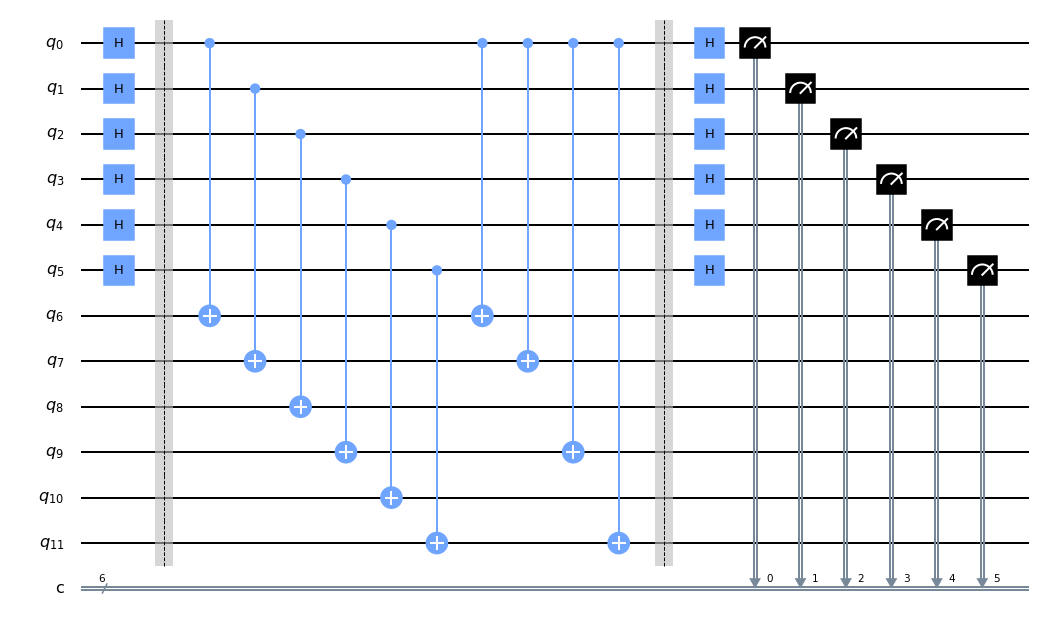

In [2]:
n = 6

simon_circuit = QuantumCircuit(n*2,n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit.cx(0, 6)
simon_circuit.cx(1, 7)
simon_circuit.cx(2, 8)
simon_circuit.cx(3, 9)
simon_circuit.cx(4, 10)
simon_circuit.cx(5, 11)

simon_circuit.cx(0, 6)
simon_circuit.cx(0, 7)
simon_circuit.cx(0, 9)
simon_circuit.cx(0, 11)
# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

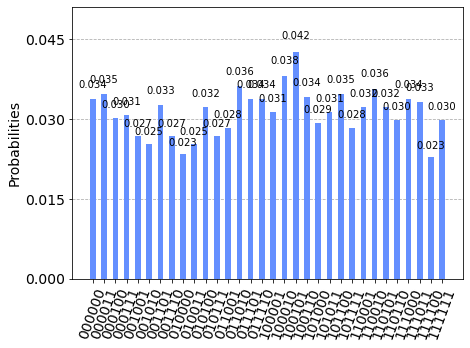

In [3]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 2048
results = execute(simon_circuit, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

In [47]:
z1=[]
z2=[]
z3=[]
for z in counts:
    h=0
    for i in z:
        if i=='1':
            h=h+1
    if h==1:
        z1.append(z)
    if h==2:
        z2.append(z)
    if h==3:
        z3.append(z)

xxx=numpy.empty((2,n),dtype=str)

for z in z1:
    for on in range(n):
        if z[on]=='1':
            xxx[0][on]='z'

for z in z2:
    for i in range(n):
        for j in range(n):
            if z[i]=='1':
                if z[j]=='1': 
                    if i!=j:
                        for ig in range(2):
                            if xxx[ig][i]=='z':
                                xxx[ig][j]='z'
                            if xxx[ig][i]=='o':
                                xxx[ig][j]='o'
                        if xxx[0][i]=='':
                            if xxx[0][j]=='': 
                                    xxx[0][j]='o'
                                    xxx[0][i]='o'    
                                    xxx[1][:]=xxx[0][:]
                                    xxx[1][j]='z'
                                    xxx[1][i]='z'
bit=numpy.zeros((2,n),dtype=int)
zeros=numpy.zeros(n)
for h in range(n):
    for g in range(2):
        if xxx[g][h]=='z':
            bit[g][h]=0
        else:
                bit[g][h]=1
print(bit[0],'- is period for f')
#' and ',bit[1] ,

[1 0 1 0 1 1] - is period for f


In [48]:
# Calculate the dot product of the results

def prqub(b, z):
    resu = 0
    for i in range(len(b)):
        resu += int(b[i]) * int(z[i])
    return (resu % 2)
f=0
for z in counts:
    f=f+1
    print( '{}.{} = {} (mod 2)'.format(b, z, prqub(b,z)) )

101011.100010 = 0 (mod 2)
101011.100101 = 0 (mod 2)
101011.110010 = 0 (mod 2)
101011.011001 = 0 (mod 2)
101011.111011 = 0 (mod 2)
101011.111100 = 0 (mod 2)
101011.110001 = 0 (mod 2)
101011.111000 = 0 (mod 2)
101011.010000 = 0 (mod 2)
101011.000100 = 0 (mod 2)
101011.010011 = 0 (mod 2)
101011.111111 = 0 (mod 2)
101011.000111 = 0 (mod 2)
101011.011010 = 0 (mod 2)
101011.010111 = 0 (mod 2)
101011.001110 = 0 (mod 2)
101011.101011 = 0 (mod 2)
101011.110101 = 0 (mod 2)
101011.001010 = 0 (mod 2)
101011.011110 = 0 (mod 2)
101011.101100 = 0 (mod 2)
101011.100001 = 0 (mod 2)
101011.001101 = 0 (mod 2)
101011.110110 = 0 (mod 2)
101011.000011 = 0 (mod 2)
101011.011101 = 0 (mod 2)
101011.100110 = 0 (mod 2)
101011.000000 = 0 (mod 2)
101011.101000 = 0 (mod 2)
101011.001001 = 0 (mod 2)
101011.101111 = 0 (mod 2)
101011.010100 = 0 (mod 2)


In [ ]:
def simon_oracle(b):
    """returns a Simon oracle for bitstring b"""
    b = b[::-1] # reverse b for easy iteration
    n = len(b)
    qc = QuantumCircuit(n*2)
    # Do copy; |x>|0> -> |x>|x>
    for q in range(n):
        qc.cx(q, q+n)
    if '1' not in b: 
        return qc  # 1:1 mapping, so just exit
    i = b.find('1') # index of first non-zero bit in b
    # Do |x> -> |s.x> on condition that q_i is 1
    for q in range(n):
        if b[q] == '1':
            qc.cx(i, (q)+n)
    return qc 